# Titanic - Feature Engineer - Age and Pclass - 13:20 23/10/2025

## Preparation

In [5]:
# import necessary library
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load feature engineered dataset (FamilySize)
path_dir = join("..", "..", "data")
input_dir = join(path_dir, "feature_engineered", "familySize")
df = pd.read_csv(join(input_dir, "familySize_engineered_train.csv"))
df_test = pd.read_csv(join(input_dir, "familySize_engineered_test.csv"))

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,7.2500,2,2
1,2,1,1,0,38.0,71.2833,0,2
2,3,1,3,0,26.0,7.9250,2,1
3,4,1,1,0,35.0,53.1000,2,2
4,5,0,3,1,35.0,8.0500,2,1


## Data visualization

<Axes: >

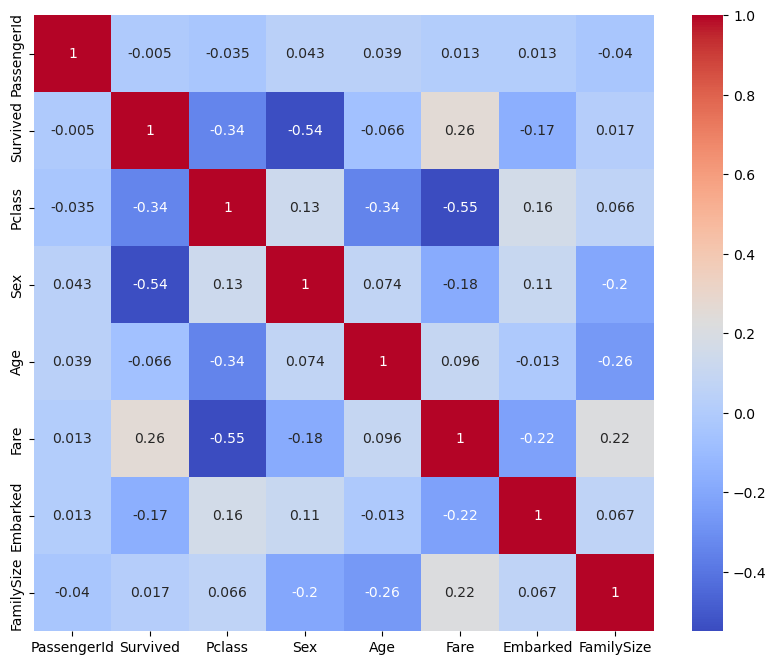

In [6]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Top five highest absolute value of correlation between two features (not count `Survived`):
- `Pclass` vs `Fare`: -0.55
- `Age` vs `Pclass`: -0.34
- `FamilySize` vs `Age`: -0.26
- `Fare` vs `FamilySize`: 0.22
- `Sex` vs `Fare`: 0.18
- `Pclass` vs `Embarked`: 0.16

Since Pclass and Fare are highly related to each other, as passengers who are in higher class tend to pay higher price, we think it's no need to have an analysis between these two features. Instead, we focused on `Age` and `Pclass`.

We created a new feature called `AgeAndPclass`, it will replace `Age` and `Pclass`.

$$
\text{AgeAndPclass} = \text{Age} * \text{Pclass}
$$

The smaller `AgeAndPclass` get, the higher survival chance the passengers have.

From the correlation heatmap, we can see that `PassengerId` does not have such high correlation with every other features, because of that, we decided to remove this feature.

In [7]:
# Feature engineering: Create new feature `AgeAndPclass`
df["AgeAndPclass"] = df["Age"] * df["Pclass"]
df_test["AgeAndPclass"] = df_test["Age"] * df_test["Pclass"]

df = df.drop(['Age', 'Pclass', 'PassengerId'], axis=1)
df_test = df_test.drop(['Age', 'Pclass', 'PassengerId'], axis=1)

# Save file
df.to_csv(join(path_dir, "feature_engineered", "ageAndPclass", "ageAndPclass_engineered_train.csv"), index=False)
df_test.to_csv(join(path_dir, "feature_engineered", "ageAndPclass", "ageAndPclass_engineered_test.csv"), index=False)

df.head()

,Survived,Sex,Fare,Embarked,FamilySize,AgeAndPclass
0,0,1,7.2500,2,2,66.0
1,1,0,71.2833,0,2,38.0
2,1,0,7.9250,2,1,78.0
3,1,0,53.1000,2,2,35.0
4,0,1,8.0500,2,1,105.0


# The end